In [99]:
import openpyxl
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score,recall_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, balanced_accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
from mrmr import mrmr_classif
from joblib import dump, load
from scipy.stats import randint
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('data/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df_test = df.sample(18, random_state=50)
df_test.to_csv('data/new_data.csv', index = False)
df = df.drop(df_test.index)

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,53.528889,132.424444,198.394444,0.233333,136.752222,0.887778,0.553333
std,9.453725,18.493057,109.640341,0.423188,25.574158,1.065395,0.497424
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.replace(['Y','N'],[1,0], inplace = True)
df.replace(['M','F'],[1,0],inplace = True)

In [10]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,53.528889,0.791111,132.424444,198.394444,0.233333,136.752222,0.405556,0.887778,0.553333
std,9.453725,0.406741,18.493057,109.640341,0.423188,25.574158,0.491272,1.065395,0.497424
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,172.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,222.500000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [11]:
df = pd.get_dummies(df, dtype=float)

In [113]:
df['Cholesterol'].replace(0, np.nan, inplace=True)
df.dropna(inplace=True)

In [12]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,160,180,0,156,0,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,130,283,0,98,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,0,138,214,0,108,1,1.5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54,1,150,195,0,122,0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [114]:
df.shape

(730, 19)

In [59]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,53.528889,0.791111,132.424444,198.394444,0.233333,136.752222,0.405556,0.887778,0.553333,0.542222,0.186667,0.222222,0.048889,0.204444,0.601111,0.194444,0.068889,0.502222,0.428889
std,9.453725,0.406741,18.493057,109.640341,0.423188,25.574158,0.491272,1.065395,0.497424,0.498491,0.389860,0.415971,0.215756,0.403519,0.489942,0.395992,0.253406,0.500273,0.495193
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,172.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,222.500000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [45]:
### RandomForest

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
rf = RandomForestClassifier(random_state=50)
model = rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Recall Score: ',recall_score(y_test,y_pred))
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))
print('class ratios: \n', pd.Series(y_pred).value_counts()/y_pred.shape[0], '\n')
print(classification_report(y_test, y_pred))

Recall Score:  0.93
Balanced Accuracy Score:  0.8775
f1:  0.8985507246376813
class ratios: 
 1    0.594444
0    0.405556
Name: count, dtype: float64 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        80
           1       0.87      0.93      0.90       100

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [47]:
df['HeartDisease'].value_counts()

HeartDisease
1    498
0    402
Name: count, dtype: int64

In [38]:
### SVM
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
svc = SVC(random_state=50)
model = svc.fit(X_train,y_train)
y_pred_simple = model.predict(X_test)
print('Recall Score: ',recall_score(y_test,y_pred))
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))
print('class ratios: \n', pd.Series(y_pred).value_counts()/y_pred.shape[0], '\n')
print(classification_report(y_test, y_pred))

Recall Score:  0.93
Balanced Accuracy Score:  0.8775
f1:  0.8985507246376813
class ratios: 
 1    0.594444
0    0.405556
Name: count, dtype: float64 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        80
           1       0.87      0.93      0.90       100

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [31]:
### XGBC
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
xbc = XGBClassifier(random_state=50)
model = xbc.fit(X_train,y_train)
y_pred_simple = model.predict(X_test)
print('Recall Score: ',recall_score(y_test,y_pred))
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))
print('class ratios: \n', pd.Series(y_pred).value_counts()/y_pred.shape[0], '\n')
print(classification_report(y_test, y_pred))

Recall Score:  0.93
Balanced Accuracy Score:  0.8775
Recall Score:  0.93
class ratios: 
 1    0.594444
0    0.405556
Name: count, dtype: float64 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        80
           1       0.87      0.93      0.90       100

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [63]:
#MRMR
X_train_mr = pd.DataFrame(X_train, columns = X_train.columns)
mrmr_classif(X_train_mr, y_train.values, K =7)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 26.37it/s]


['ST_Slope_Up',
 'ChestPainType_ASY',
 'ExerciseAngina',
 'Cholesterol',
 'ST_Slope_Flat',
 'Oldpeak',
 'Sex']

In [57]:
top_7 = mrmr_classif(X_train_mr, y_train.values, K =)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31.32it/s]


In [58]:
X = df[top_7]
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
rf = RandomForestClassifier(random_state=50)
model = rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Recall Score: ',recall_score(y_test,y_pred))
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))
print('class ratios: \n', pd.Series(y_pred).value_counts()/y_pred.shape[0], '\n')
print(classification_report(y_test, y_pred))

Recall Score:  0.87
Balanced Accuracy Score:  0.8162499999999999
f1:  0.8446601941747572
class ratios: 
 1    0.588889
0    0.411111
Name: count, dtype: float64 

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        80
           1       0.82      0.87      0.84       100

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



In [121]:
pipe = Pipeline([
    #("imputer",KNNImputer()),
    ("std_scaler",StandardScaler()),
    ("classifier",RandomForestClassifier())
])


parameters = {
    #"imputer__strategy":["median","mean"],
    "classifier__n_estimators":[2,5,10,20,30,50,100,150],
    "classifier__max_depth":[2,3,4,5,6,7,8,9,10,20],
    "classifier__random_state": [50],
    "classifier__n_jobs":[-1]
}

X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

CV = GridSearchCV(pipe,parameters, scoring="recall")
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=50,test_size=0.2,stratify=y)
CV.fit(X_train,y_train)
y_pred = CV.predict(X_test)
print('Recall Score: ',recall_score(y_test,y_pred))
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))
print('class ratios: \n', pd.Series(y_pred).value_counts()/y_pred.shape[0], '\n')
print(classification_report(y_test, y_pred))

Recall Score:  0.9428571428571428
Balanced Accuracy Score:  0.8990601503759399
f1:  0.8979591836734694
class ratios: 
 1    0.527397
0    0.472603
Name: count, dtype: float64 

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        76
           1       0.86      0.94      0.90        70

    accuracy                           0.90       146
   macro avg       0.90      0.90      0.90       146
weighted avg       0.90      0.90      0.90       146



In [98]:
CV.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=20, n_jobs=-1,
                                        random_state=50))])

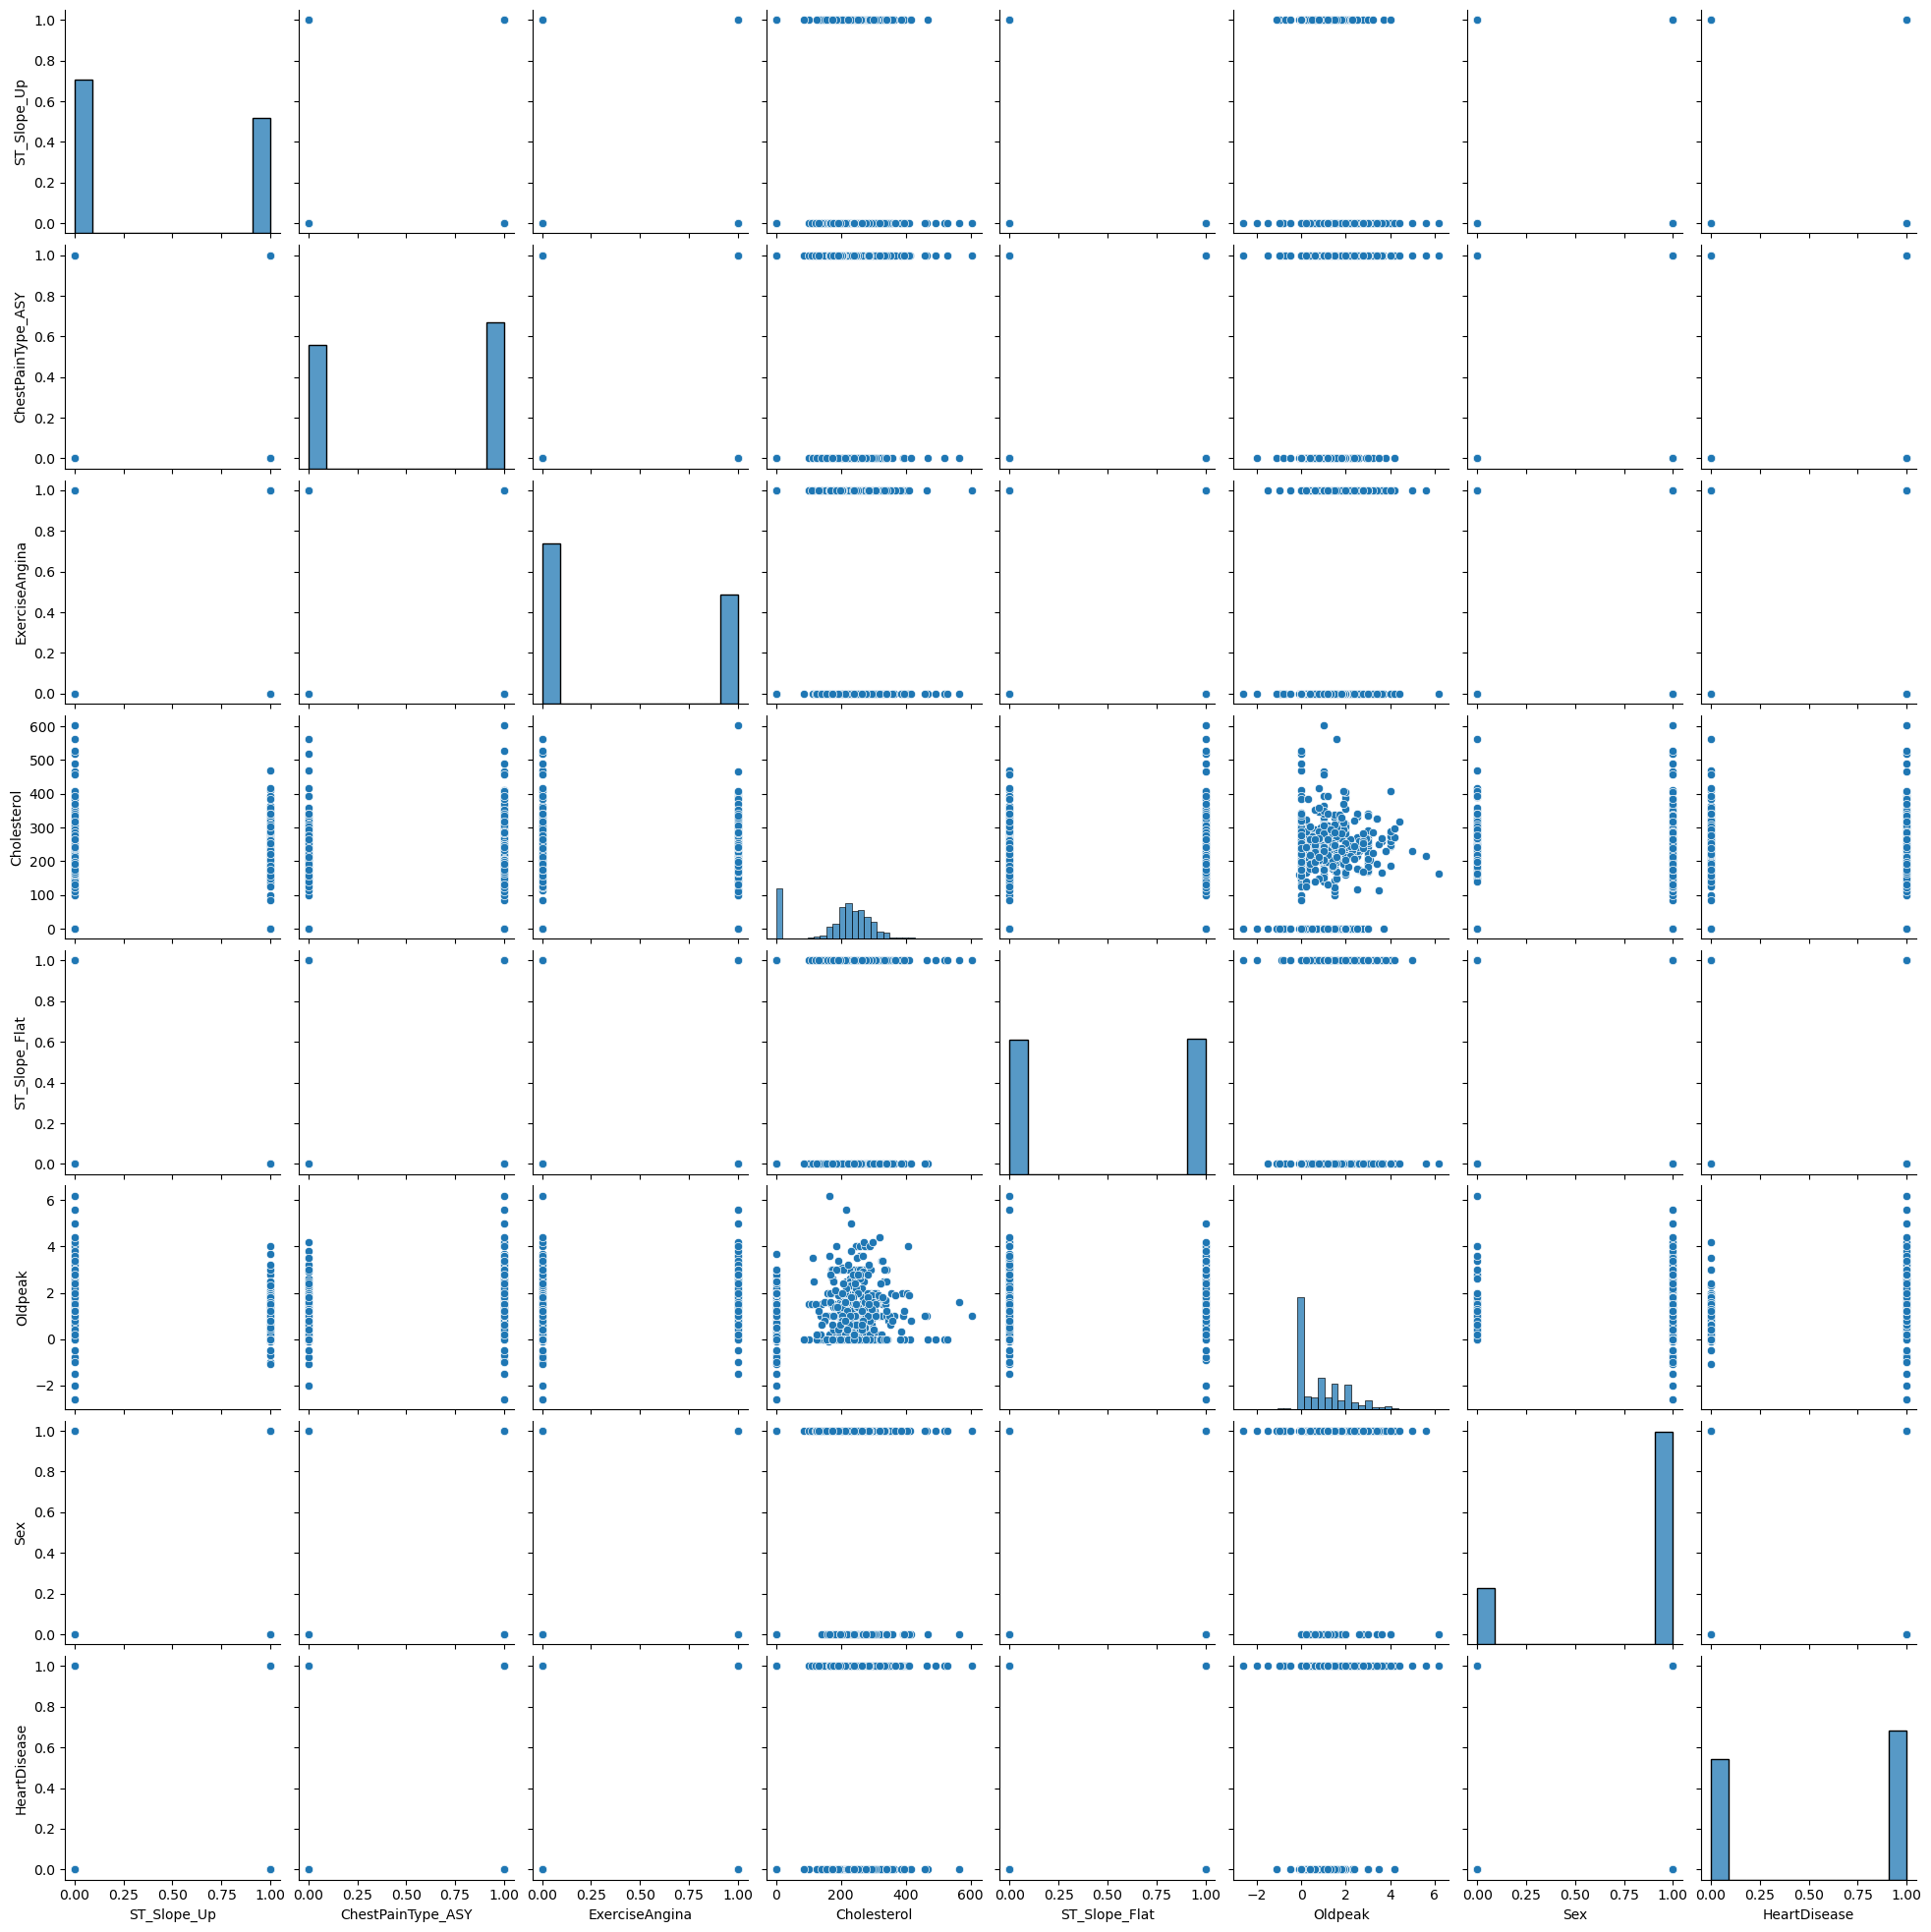

In [65]:
sns.pairplot(df[['ST_Slope_Up',
 'ChestPainType_ASY',
 'ExerciseAngina',
 'Cholesterol',
 'ST_Slope_Flat',
 'Oldpeak',
 'Sex','HeartDisease']])

In [144]:
# Create a RandomForestClassifier
classifier = RandomForestClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(2, 150),  # You can adjust the range based on your needs
    'max_depth': randint(2, 20),  # You can adjust the range based on your needs
    'n_jobs': [-1]
}

# Create a RandomizedSearchCV object
CV = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=100, scoring="recall", cv=5)

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.2, stratify=y)

# Fit the RandomizedSearchCV to the training data
CV.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_classifier = CV.best_estimator_
best_params = CV.best_params_

# Make predictions using the best estimator
y_pred = best_classifier.predict(X_test)

# Print the best hyperparameters and evaluation metrics
print('Best Hyperparameters:', best_params)
print('Recall Score:', recall_score(y_test, y_pred))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Class Ratios:\n', pd.Series(y_pred).value_counts() / y_pred.shape[0], '\n')
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 3, 'n_estimators': 98, 'n_jobs': -1}
Recall Score: 0.9
Balanced Accuracy Score: 0.9039473684210526
F1: 0.9
Class Ratios:
 0    0.520548
1    0.479452
Name: count, dtype: float64 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        76
           1       0.90      0.90      0.90        70

    accuracy                           0.90       146
   macro avg       0.90      0.90      0.90       146
weighted avg       0.90      0.90      0.90       146



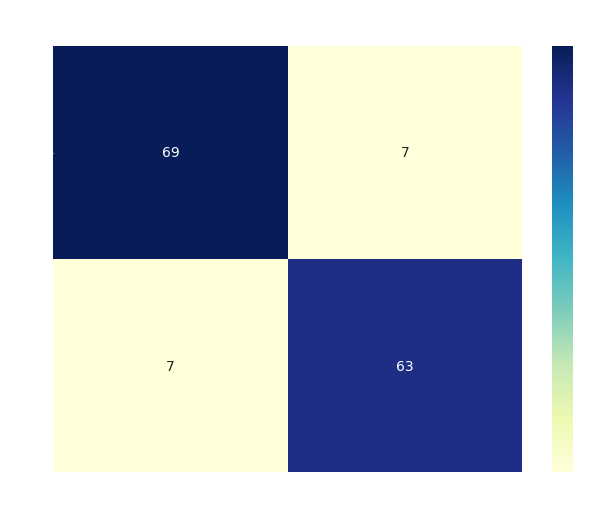

In [149]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)


#Create Heatmap
#plt.style.use()
#fig, ax = plt.subplots()

#L = 6
#x = np.linspace(0, L)
#ncolors = len(plt.rcParams['axes.prop_cycle'])
#shift = np.linspace(0, L, ncolors, endpoint=False)
#plt.figure(facecolor='none')

    
    
sns.heatmap(pd.DataFrame(cnf_matrix), annot= True, cmap = "YlGnBu", fmt ="g")
ax.xaxis.set_label_position("top")
#plt.figure(facecolor='none')
plt.tight_layout()
plt.title("Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)
#plt.savefig('confusion_matrix1.png')

In [89]:

cnf_matrix

array([[65, 15],
       [ 6, 94]], dtype=int64)

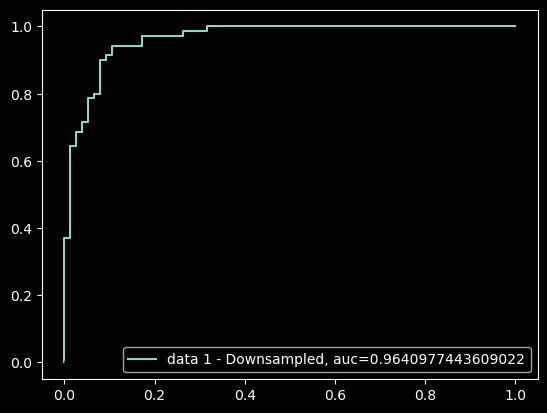

In [151]:
y_pred_proba = CV.predict_proba(X_test)[::,1]

fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc= metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr, tpr, label= "data 1 - Downsampled, auc=" +str(auc))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
ax.set_facecolor('none')
fig.patch.set_alpha(0.0)
plt.show()

In [104]:
df_test1 = df_test.copy()

In [108]:
df_test1 = df_test1.drop('HeartDisease',axis=1)
df_test1.replace(['Y','N'],[1,0], inplace = True)
df_test1.replace(['M','F'],[1,0],inplace = True)
df_test1 = pd.get_dummies(df_test1, dtype=float)

In [ ]:
y_pred2 = CV.

In [109]:
df['Cholesterol'].value_counts()

Cholesterol
0      170
254     11
223     10
220     10
230      9
      ... 
347      1
365      1
412      1
491      1
131      1
Name: count, Length: 220, dtype: int64

In [ ]:
df['Cholesterol'].replace(0, np.nan, inplace=True)